<div align="center">
<br>
<br> 

# Error-Free Quantum States: Implementing and Analyzing the Repetition Code

### Quantum Computation and Error Correction
##### Fall Semester 2024
<br>
<br>
<br>

###

##### Abd-Ul-Haq Amine Ladrem
##### a.ladrem@stud.unibas.ch
##### 24-065-500

</div>

## I. Introduction & Motivation

### 1.2. Classical Error Correction: The Example of CRC
In classical computing, information is stored in bits that can only be \(0\) or \(1\). When these bits experience errors (due to electrical noise, for example), classical error-correcting codes like parity checks or **CRC (Cyclic Redundancy Check)** provide efficient ways to detect and sometimes correct these mistakes.

### 1.2. From Bits to Qubits: Why Classical Solutions Don’t Translate

Quantum computing introduces qubits, which can exist in superpositions such as ($\alpha \lvert 0 \rangle + \beta \lvert 1 \rangle$) . While this enables powerful computations beyond classical capabilities, it also makes qubits fragile. Three main challenges make classical techniques like **CRC** insufficient for qubits:

1. **No-Cloning Theorem**: Unlike bits, qubits cannot be freely copied. This rules out simple redundancy or multiple checksums.  
2. **Measurement Collapse**: Measuring a qubit forces it into a definite state ($\lvert 0 \rangle or \lvert 1 \rangle$), destroying the superposition we might need for quantum algorithms.  
3. **More Varied Errors**: Qubits suffer not just bit-flips ($ \lvert 0 \rangle \leftrightarrow \lvert 1 \rangle $), but also phase-flips and more complex decoherence processes.

Hence, while CRC and other classical methods excel at detecting changes in bits, they do not directly solve the unique issues posed by quantum information.

### 1.3. Repetition Code: A Starting Point for QEC

To protect quantum information against errors, researchers developed **Quantum Error Correction (QEC)**. The fundamental idea is to encode one “logical” qubit’s information across multiple “physical” qubits, so that small errors on individual qubits can be detected and corrected without collapsing the entire system.

A simple, yet illustrative example is the **3-qubit repetition code**. Here, a logical $\lvert 0 \rangle$  or  $\lvert 1 \rangle$ is spread across three physical qubits:


($\lvert 0_L \rangle = \lvert 000 \rangle \quad \text{and} \quad \lvert 1_L \rangle = \lvert 111 \rangle$).


If one qubit flips, the other two “outvote” it during decoding. Although this method mainly addresses bit-flip errors, it demonstrates the key point of **redundancy** used in more advanced error-correcting codes.

### 1.4. Project Overview

In this project, we will:

- **Theory of the 3-Qubit Repetition Code**: An introduction of the fundamentals of the 3-qubit repetition code and how it encodes a single logical qubit across three physical qubits and correct single bit-flip error.
- **Implement the 3-qubit repetition code in Qiskit**: Demonstrate encoding, error injection, and decoding by majority vote.
- **Generalization to n-Qubit Codes**: We extend the 3-qubit approach to an 𝑛-qubit repetition code,
- **Analyze Performance Under Noise**: Examine how well the code corrects errors in simulated environments.  



## II. Overview of the 3-Qubit Repetition Code

### 2.1 Basic Idea
We suppose that we want to protect a single qubit that, for simplicity, is initially $\lvert 0 \rangle$ or $\lvert 1 \rangle$ . In the **3-qubit repetition code**, we replace:

$\lvert 0 \rangle \rightarrow \lvert 0_L \rangle = \lvert 000 \rangle \quad \text{,} \quad  \lvert 1 \rangle \rightarrow  \lvert 1_L \rangle = \lvert 111 \rangle$
- **Logical $ \lvert 0 \rangle $** is spread across three qubits as  **$ \lvert 000 \rangle $**
- **Logical $ \lvert 1 \rangle $** is spread across three qubits as  **$ \lvert 111 \rangle $**

This code is called a “repetition code” because it repeats the state of a single logical qubit across multiple physical qubits.

**Encoding a General Single-Qubit State**

More generally:
<center>

$ \psi = \alpha\lvert 0 \rangle + \beta\lvert 1 \rangle   $

</center>

then **the encoded (logical) state** becomes:

<center>

**$\lvert \psi_L \rangle = \alpha\lvert 0_L \rangle + \beta\lvert 0_L \rangle = \alpha\lvert 000 \rangle + \beta\lvert 111 \rangle   $**

</center>

### 2.2 Bit-Flip Error Detection
A **bit-flip error** (often called an **𝑋-error**) changes $\lvert 0 \rangle \leftrightarrow  \lvert 1 \rangle$ We represent a bit-flip on the 𝑖-th qubit by an operator $𝑋_i$. For example, $𝑋_1$ means “apply an 𝑋 (NOT) gate to qubit 1 only.”
 - **No Error**

      If no qubit is flipped, the code state remains:
      <center>

   ($\lvert 0_L \rangle = \lvert 000 \rangle \quad \text{or} \quad \lvert 1_L \rangle = \lvert 111 \rangle$).

      </center>

  - **Single-Qubit Flip**

      Assume the second qubit encounters a bit-flip error (**$𝑋_2$**). Mathematically:

  <center>  

$X_2 = I \bigotimes X \bigotimes I$

  </center>

  Where $X$ is the Pauli $\sigma_x$ (NOT) operator acting on a single qubit , and $I$ is the identity on the others

  Applying this to $ \psi_L $ : 

  <center>

 $X_2 \lvert \psi_L \rangle = X_2(\alpha \lvert 000 \rangle + \beta \lvert 111 \rangle)$

$= \alpha (I \bigotimes X \bigotimes I) \lvert 000 \rangle + \beta (I \bigotimes X \bigotimes I) \lvert 111 \rangle$

$= \alpha \lvert 0\underline{1}0 \rangle + \beta \lvert 1\underline{0}1 \rangle$

$= \alpha \lvert 010 \rangle + \beta \lvert 101 \rangle.$


 </center>

 ### 2.3 Detection by Majority Vote

 After an error might occur, all three qubits are measured in the computational (Z) basis:

<center>


 **$\lvert 0 \rangle , \lvert 1 \rangle \rightarrow measurement outcomes 0 or 1.$**

 </center>

  - If the initial state is $\lvert 000 \rangle$ and see {000,001,010,100} , the final state will be decoded as logical $\lvert 0 \rangle$
  - If the initial state is $\lvert 111 \rangle$ and see {111,110,101,011} , the final state will be decoded as logical $\lvert 1 \rangle$

Mathematically, we can see the **measurement** as projecting the erroneous state onto one of eight classical outcomes:
<center>

$\lvert b_1 b_2 b_3 \rangle \text{ where  each  } b_i \in \{0,1\}.$

</center>


The code’s decoding rule is:
- Majority of 0’s: Decode as $\lvert 0 \rangle$
- Majority of 1’s: Decode as $\lvert 1 \rangle$

Hence, any single 𝑋-error is correctable: we can identify which qubit is flipped and fix it (or equivalently, interpret the measurement outcome correctly).


### 2.4 Limitations and Extensions

1. **Single-Error Correction**

The 3-qubit repetition code only corrects a single bit-flip. If two or more qubits flip, the majority vote fails. For example, flipping qubits 1 and 2 in $\lvert 000 \rangle$ turnouts $\lvert 110 \rangle$, which looks like a single flip on the third qubit if we trust majority vote. That leads to an incorrect decoding.

2. **No Phase-Error Protection**

Bit-flips (𝑋) are not the only type of quantum error. Phase flips (𝑍-errors) and more general errors can corrupt the qubit state. Because the 3-qubit repetition code is designed to detect and correct bit-flips only, it does not protect against phase flips.


3. **Resource Overhead**

Storing one logical qubit requires three physical qubits. For large-scale quantum computation, we need more efficient codes (or repeated layers of code) to handle realistic error rates. That is why more advanced codes (e.g., **Shor code**, **surface code**) eventually come into play.

Despite these limitations, the **3-qubit repetition code** is an **indispensable stepping stone** in **quantum error correction**. It introduces the fundamental idea of **spreading logical information across multiple qubits**, which all modern QEC schemes leverage.

## III. 3-Qubit Repetition Code Implementation  in Qiskit

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

In [3]:
def encode_repetition_code(logical_bits):
    """Encodes logical bits into a 3-qubit repetition code."""
    num_logical = len(logical_bits)
    num_physical = 3 * num_logical
    qc = QuantumCircuit(num_physical, num_physical)
    
    for i, bit in enumerate(logical_bits):
        if bit == '1':
            qc.x(3*i)
            qc.x(3*i + 1)
            qc.x(3*i + 2)
    
    return qc

def measure_repetition_code(qc):
    num_qubits = qc.num_qubits
    for i in range(num_qubits):
        qc.measure(i, i)
    return qc

def introduce_bit_flip_error(qc, qubit_index):
    qc.x(qubit_index)
    return qc

def majority_vote(counts, num_logical):
    """Performs majority voting to decode logical bits."""
    decoded_bits = []
    for result, count in counts.items():
        # Reverse since Qiskit measures in reverse order
        measured_bits = result[::-1]  
        for i in range(num_logical):
            # Select the three physical qubits corresponding to the logical bit
            qubit_group = measured_bits[3*i:3*i+3]
            # Majority voting
            if qubit_group.count('1') > qubit_group.count('0'):
                decoded_bits.append('1')
            else:
                decoded_bits.append('0')
    return ''.join(decoded_bits)


### First Example : one bit flip error

In [4]:
logical_bits = '10101'
qc = encode_repetition_code(logical_bits)

qc = introduce_bit_flip_error(qc, 14)
qc = measure_repetition_code(qc)

simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1000).result()
counts = result.get_counts()

decoded_bits = majority_vote(counts, len(logical_bits))

print("Measurement counts:", counts)
print("Decoded logical bits:", decoded_bits)

print("\n")

Measurement counts: {'011000111000111': 1000}
Decoded logical bits: 10101




### Second Example : Two bit flip error on same logical qubit

In [5]:
logical_bits = '10101'
qc = encode_repetition_code(logical_bits)

# Introduce two bit-flip error on the last qubit
qc = introduce_bit_flip_error(qc, 14)
qc = introduce_bit_flip_error(qc, 13)
qc = measure_repetition_code(qc)

simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1000).result()
counts = result.get_counts()

decoded_bits = majority_vote(counts, len(logical_bits))

print("Measurement counts:", counts)
print("Decoded logical bits:", decoded_bits)

Measurement counts: {'001000111000111': 1000}
Decoded logical bits: 10100


## IV. Generalizing the 3-Qubit Repetition Code to an 𝑛-Qubit Code

Thus far, we’ve seen how the **3-qubit repetition code** spreads a single logical bit/qubit across **3 physical qubits**. When one qubit flips, the other two can “outvote” it using a simple majority vote. More generally, we can increase this repetition from 3 qubits to n qubits.

### 4.1 Encoding

- A logical bit $\lvert 0 \rangle$ or $\lvert 1 \rangle$  is replicated across *n* physical qubits

<center>

$\lvert 0 \rangle \rightarrow \lvert 0 ... 0 \rangle$ *(all n zeros)*, $\lvert 1 \rangle \rightarrow \lvert 1 ... 1 \rangle$ *(all n ones)*,

</center>

### 4.2 Decoding / Majority Vote
- After measurement, if the majority of qubits in a block are measured as $\lvert 0 \rangle$ , decode "0" ; if the majority are $\lvert 1 \rangle$ , decode "1".
- This correct up to *$\left\lfloor \frac{n-1}{2} \right\rfloor$* qubit flipping

### 4.3 Probability of Majority Flip
- If each qubit flips with probability **p**, independently, the probability that a **majority** of the *n* qubits flip is given by a ***binomial*** formula:

<center>

$P_{\text{majority flip}}(n, p) = \sum_{k=\lceil \frac{n}{2} \rceil}^{n} \binom{n}{k} p^k (1-p)^{n-k}.$

</center>

- For example, if *n=3*, that sum simplifies to ***$3p^2(1-p) + p^3.$*** As ***𝑛*** grows (and ***𝑝<0.5***), the chance of a majority flipping decreases exponentially, hence the code becomes more robust—but also requires more qubits.

### 4.4 Resource Overhead
- Storing one logical bit/qubit now uses **𝑛** physical qubits, which can become expensive. We typically choose **𝑛** based on the error rate we want to handle.



### Note
- In a repetition code of length 𝑛, we typically pick **odd 𝑛** so the majority vote after measurement is always decisive. For example, with 𝑛=3, a 2-to-1 vote clearly determines the final state. However, if 𝑛=4 (or any even number) we can encounter a **tie** (e.g., 2 vs. 2), making it unclear whether to decode as “0” or “1.” Though one can define a tiebreaker rule, it reduces certainty about the correct outcome. Hence, odd 𝑛 is preferred in most repetition codes to avoid ambiguous tie situations.



In summary, the 3-qubit repetition code is just a special case of an 𝑛-qubit repetition code. The logic remains the same; we just replicate a single bit/qubit across 
𝑛 physical qubits. If we do the same steps (encode, optionally inject flips, measure, majority vote), we can handle up to $\left\lfloor \frac{n-1}{2} \right\rfloor$ bit-flips in that block.


### 4.5 Implementation in Qiskit

In [6]:
def encode_n_qubit_repetition(logical_bits, n):
    num_logical = len(logical_bits)
    num_physical = n * num_logical
    qc = QuantumCircuit(num_physical, num_physical)
    
    for i, bit in enumerate(logical_bits):
        if bit == '1':
            for offset in range(n):
                qc.x(n*i + offset)
    return qc

def measure_all(qc):
    for i in range(qc.num_qubits):
        qc.measure(i, i)
    return qc

def introduce_bit_flips(qc, flip_positions):
    """
    Flip specified qubits (simulate bit-flip errors).
    """
    for pos in flip_positions:
        qc.x(pos)
    return qc

def majority_vote_nqubits(counts, num_logical, n):
    decoded_results = []
    
    for outcome_str, freq in counts.items():
        # Reverse outcome so qubit0 is at index 0
        outcome_reversed = outcome_str[::-1]
        
        logical_decoded = []
        for i in range(num_logical):
            block = outcome_reversed[i*n : (i+1)*n]
            ones = block.count('1')
            zeros = n - ones
            if ones > zeros:
                logical_decoded.append('1')
            else:
                logical_decoded.append('0')
        decoded_results.append((''.join(logical_decoded), freq))
    
    return decoded_results

# Suppose we have 5 logical bits, '01010', and we want 5 qubits per bit => total 25 qubits
logical_bits = '01010'
n = 5

qc = encode_n_qubit_repetition(logical_bits, n)

introduce_bit_flips(qc, [1, 2, 7])

measure_all(qc)

sim = AerSimulator()
tqc = transpile(qc, sim)
result = sim.run(tqc, shots=1000).result()
counts = result.get_counts()

decoded_results = majority_vote_nqubits(counts, num_logical=len(logical_bits), n=n)

print("Counts:", counts)
print("Decoded logical bits:", decoded_results)

Counts: {'0000011111000001101100110': 1000}
Decoded logical bits: [('01010', 1000)]


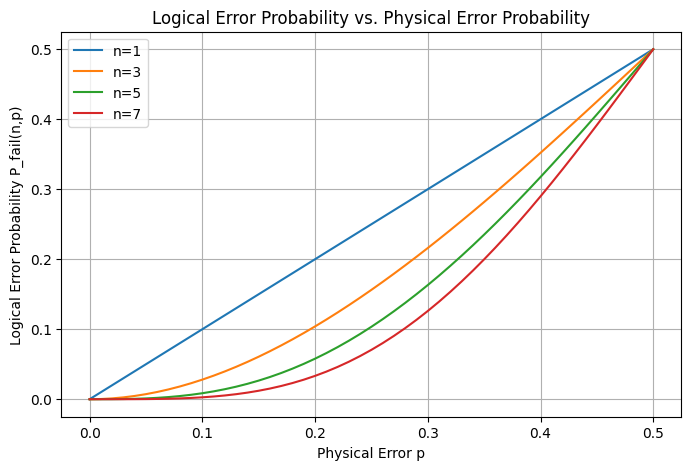

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

def majority_flip_probability(n, p):
    half = (n // 2) + 1  # for odd n
    prob = 0.0
    for k in range(half, n+1):
        prob += math.comb(n, k)*(p**k)*((1-p)**(n-k))
    return prob

p_values = np.linspace(0,0.5,  51)  # from 0.0 to 0.5
plt.figure(figsize=(8,5))

for n in [1,3,5,7]:
    P_vals = [majority_flip_probability(n, p) for p in p_values]
    plt.plot(p_values, P_vals, label=f"n={n}")

plt.title("Logical Error Probability vs. Physical Error Probability")
plt.xlabel("Physical Error p")


plt.ylabel("Logical Error Probability P_fail(n,p)")
plt.legend()
plt.grid(True)
plt.show()


## V. Conclusion

In this project , we have seen and demonstrated how the **3-qubit repetition code** can secure a single logical qubit from a single bit-flip error by distributing the logical state across multiple physical qubits. Also , we proved that any single bit-flip can be detected and corrected via a majority vote on measurement outcomes.
This concept generalizes to **n-qubit repetition code**, which corrects up to **$\left\lfloor \frac{n-1}{2} \right\rfloor$** errors at the cost of using ***n*** physical qubits per logical qubit